In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
crime=pd.read_csv("crime_data.csv")

In [60]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [61]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(crime.iloc[:,1:]))
data

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


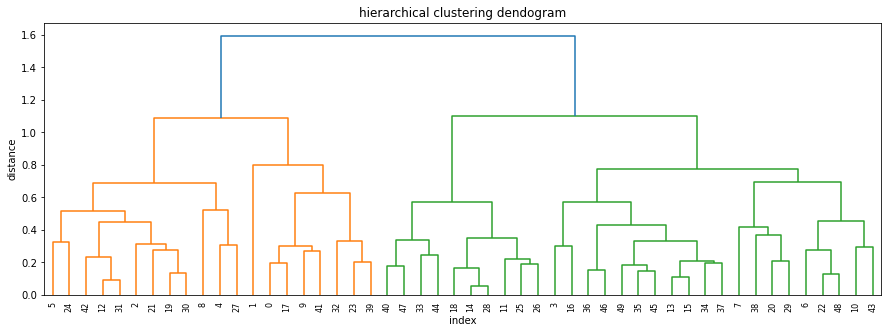

In [63]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch    # for creating dendrogram

z= linkage(data ,method='complete',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("hierarchical clustering dendogram")
plt.xlabel("index")
plt.ylabel("distance")
sch.dendrogram(z)
plt.show()

In [67]:
from sklearn.cluster import AgglomerativeClustering
df = AgglomerativeClustering(n_clusters =7,linkage='complete',affinity='euclidean').fit(data)

cluster_labels=pd.Series(df.labels_)
cluster_labels
crime['clust']=cluster_labels
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,5
4,California,9.0,276,91,40.6,0


# k-mean

In [80]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [73]:
crime=pd.read_csv("crime_data.csv")

In [74]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [75]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_crime = scaler.fit_transform(crime.iloc[:,1:])

In [76]:
scaled_crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [82]:
wcss=[]
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_crime)
    wcss.append(kmeans.inertia_)
wcss

[200.0,
 104.96163315756871,
 80.0888613219962,
 57.55425863091104,
 50.52026552535068,
 43.92746404497574,
 40.52183461131976,
 34.6873883978491,
 32.70648136388185,
 28.311639397122555]

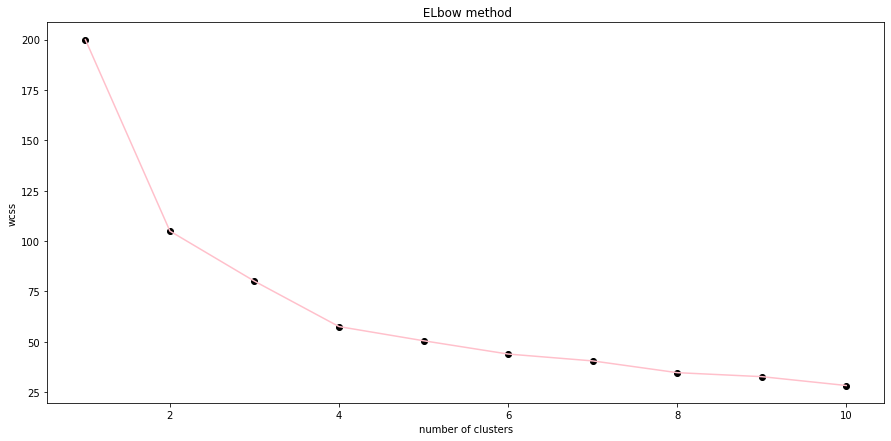

In [85]:
plt.figure(figsize=(15,7))
plt.plot(range(1,11),wcss,color="pink")
plt.scatter(range(1,11),wcss,color='black')
plt.title(" ELbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [87]:
# now building the cluster algo

from sklearn.cluster import KMeans 
cluster_new=KMeans(4,random_state=60)
cluster_new.fit(scaled_crime)

KMeans(n_clusters=4, random_state=60)

In [89]:
cluster_new.labels_

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 2, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3])

In [91]:
crime['cluster_new']=cluster_new.labels_

In [92]:
cluster_new.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [96]:
crime.groupby('cluster_new').agg(['mean']).reset_index()

,cluster_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,3.600000,78.538462,52.076923,12.176923
2,2,10.815385,257.384615,76.000000,33.192308
3,3,5.656250,138.875000,73.875000,18.781250


In [97]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2


# DBscan

In [110]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [111]:
crime=pd.read_csv("crime_data.csv")

In [112]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [113]:
df=crime.drop(['Unnamed: 0'],axis=1,inplace=True)

<AxesSubplot:xlabel='Assault', ylabel='Count'>

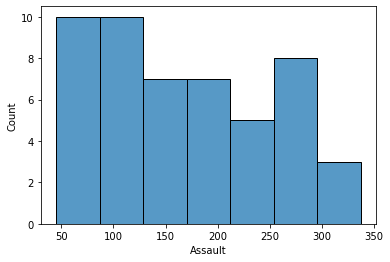

In [118]:
sns.histplot(crime.Assault)

In [119]:
stsscaler=StandardScaler().fit(crime)
x=stsscaler.transform(crime)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [120]:
model=DBSCAN(eps=1.1,min_samples=3)
model.fit(x)

DBSCAN(eps=1.1, min_samples=3)

In [121]:
model.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [122]:
df1=pd.DataFrame(model.labels_,columns=['cluster'])

In [123]:
df1.head()

,cluster
0,0
1,-1
2,1
3,2
4,-1


In [125]:
crime['clusters']=df1['cluster']

In [126]:
crime.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,-1


In [128]:
df1.cluster.value_counts()

 2    30
 0     7
 1     7
-1     6
Name: cluster, dtype: int64